<a href="https://colab.research.google.com/github/TooBrokeForEvo/NLPCV_Assessment/blob/main/Assignment_3091801.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Archive:  drive/MyDrive/archive.zip
replace amer_sign2.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: amer_sign2.png          
  inflating: amer_sign3.png          
  inflating: american_sign_language.PNG  
  inflating: sign_mnist_test.csv     
  inflating: sign_mnist_test/sign_mnist_test.csv  
  inflating: sign_mnist_train.csv    
  inflating: sign_mnist_train/sign_mnist_train.csv  
training sample: 21964
Validation samples: 5491


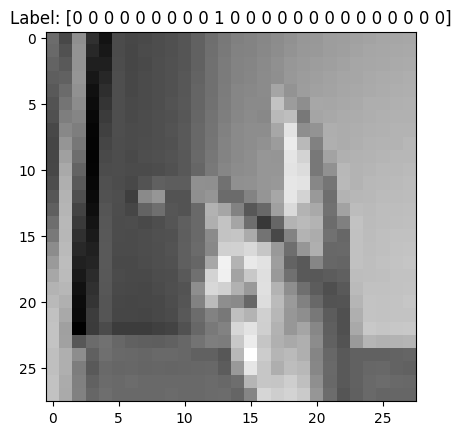

In [5]:
#Environment and Data Setup
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import tensorflow as tf
from tensorflow.keras import layers
import time
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

#Load the dataset
!unzip "drive/MyDrive/archive.zip"
train_data = pd.read_csv('sign_mnist_train/sign_mnist_train.csv')
test_data = pd.read_csv('sign_mnist_test/sign_mnist_test.csv')

#Separate the labels and pixels.
y_train = train_data['label'].values
y_test = test_data['label'].values

#drop the labels
X_train = train_data.drop('label', axis=1).values
X_test = test_data.drop('label', axis=1).values

#reshape
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

#normalize
X_train = X_train / 255.0
X_test = X_test / 255.0


lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

#split
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

print(f"training sample: {X_train.shape[0]}")
print(f"Validation samples: {X_val.shape[0]}")
print

#visualise
plt.imshow(X_train[0].reshape(28, 28), cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()


In [6]:
#Building the Baseline Model
input_shape = (28, 28, 1)

model_baseline = tf.keras.Sequential([
    # Input layer
    tf.keras.Input(shape=input_shape),

    # Baseline Convolutional layers
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same"),
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Flatten and Output
    layers.Flatten(),
    layers.Dense(128, activation="relu"), # Added a hidden layer for better learning
    layers.Dense(24, activation="softmax") # Must be 24 for the ASL alphabet
])
model_baseline.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_baseline.summary()

#vgg
vgg_model = models.Sequential([
layers.Input(shape=(28, 28, 1)),

    # Block 1
    layers.Conv2D(32, (3, 3), activation="relu", padding='same'),
    layers.Conv2D(32, (3, 3), activation="relu", padding='same'),
    layers.MaxPooling2D((2, 2)),

    # Block 2
    layers.Conv2D(64, (3, 3), activation="relu", padding='same'),
    layers.Conv2D(64, (3, 3), activation="relu", padding='same'),
    layers.MaxPooling2D((2, 2)),

    # Block 3
    layers.Conv2D(128, (3, 3), activation="relu", padding='same'),
    layers.Conv2D(128, (3, 3), activation="relu", padding='same'),
    layers.MaxPooling2D((2, 2)),

    # Classification Head
    layers.Flatten(),
    layers.Dropout(0.5), # Regularization to prevent overfitting [cite: 32]
    layers.Dense(128, activation="relu"),
    layers.Dense(24, activation="softmax")
])
vgg_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()
history_vgg = vgg_model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_val, y_val))
vgg_train_time = time.time() - start_time

start_time = time.time()
history_baseline = model_baseline.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_val, y_val))
vgg_train_time = time.time() - start_time

print(f"Training time: {vgg_train_time:.2f} seconds")


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 815,608 (3.11 MB)

 Trainable params: 815,608 (3.11 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
687/687 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.1039 - loss: 2.9715 - val_accuracy: 0.8824 - val_loss: 0.3211
Epoch 2/15
687/687 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9153 - loss: 0.2478 - val_accuracy: 0.9971 - val_loss: 0.0149
Epoch 3/15
687/687 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9807 - loss: 0.0596 - val_accuracy: 0.9962 - val_loss: 0.0143
Epoch 4/15
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9864 - loss: 0.0415 - val_accuracy: 0.9971 - val_loss: 0.0101
Epoch 5/15
687/687 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9909 - loss: 0.0297 - val_accuracy: 0.9996 - val_loss: 0.0016
Epoch 6/15
687/687 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9921 - loss: 0.0244 - val_accuracy: 0.9996 - val_loss: 0.0020
Epoch 7/15
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9935 - loss: 0.0206 - val_accuracy: 0.9993 - val_loss: 0.0031
Epoch 8/15
687/687 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9936 - loss: 0.0211 - val_accuracy:

225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       331
           1       1.00      1.00      1.00       432
           2       1.00      1.00      1.00       310
           3       0.92      1.00      0.96       245
           4       0.97      0.95      0.96       498
           5       1.00      1.00      1.00       247
           6       0.89      1.00      0.94       348
           7       1.00      0.91      0.95       436
           8       1.00      1.00      1.00       288
           9       0.98      1.00      0.99       331
          10       1.00      1.00      1.00       209
          11       0.95      1.00      0.97       394
          12       1.00      0.93      0.96       291
          13       1.00      1.00      1.00       246
          14       1.00      1.00      1.00       347
          15       1.00      1.00      1.00       164
          16    

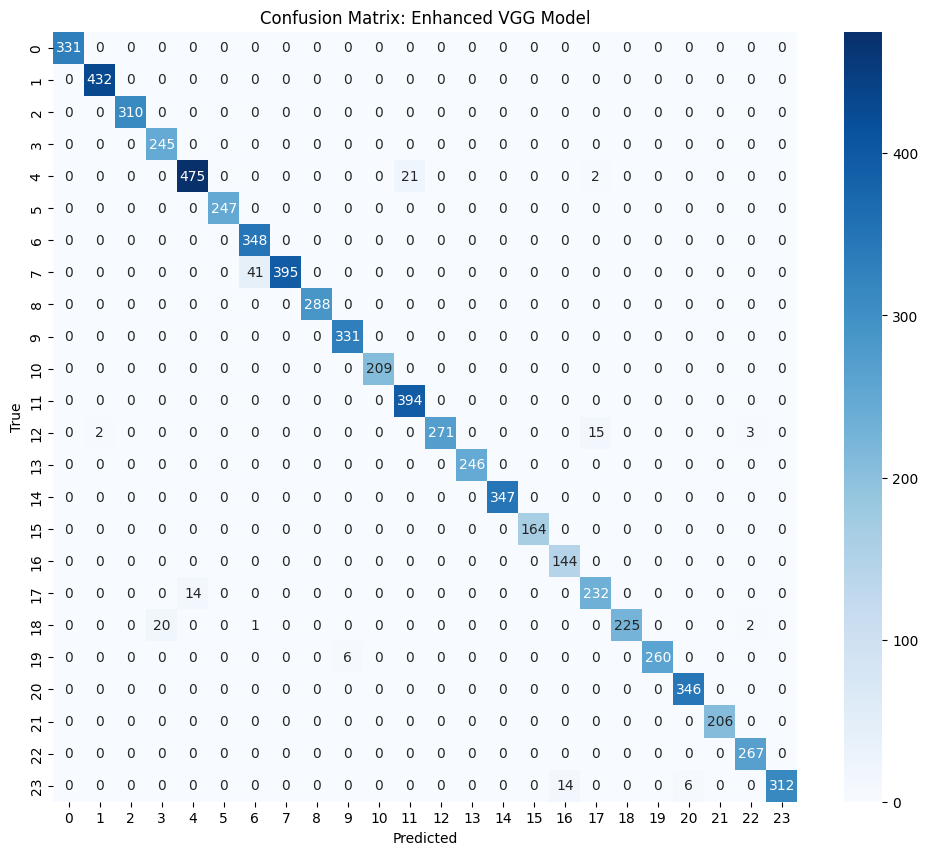

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Classification Report:

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       331
           1       1.00      0.95      0.98       432
           2       1.00      1.00      1.00       310
           3       0.98      0.92      0.95       245
           4       0.89      0.97      0.93       498
           5       0.85      1.00      0.92       247
           6       0.89      0.81      0.85       348
           7       0.85      0.94      0.89       436
           8       0.92      0.74      0.82       288
           9       0.79      0.90      0.84       331
          10       0.70      1.00      0.82       209
          11       0.83      0.77      0.80       394
          12       0.81      0.65      0.72       291
          13       1.00      0.70      0.82       246
          14       0.94      1.00      0.97       347
          15       0.92      1.00      0.96       164
          16    

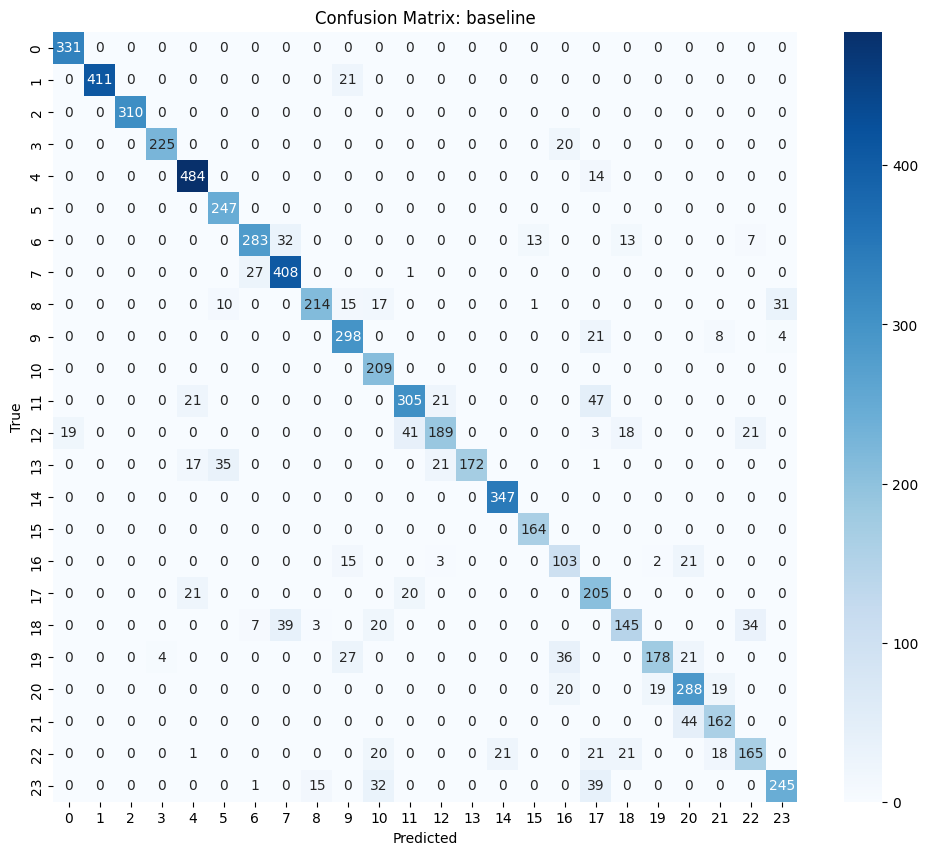

In [7]:
#Experimentation and Enhancement


# 1. Get Predictions
y_pred = vgg_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# 2. Classification Report (Precision, Recall, F1)
print("Classification Report:\n")
print(classification_report(y_true_classes, y_pred_classes))

# 3. Confusion Matrix
plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_true_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix: Enhanced VGG Model')
plt.show()


# 1. Get Predictions
y_pred = model_baseline.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# 2. Classification Report (Precision, Recall, F1)
print("Classification Report:\n")
print(classification_report(y_true_classes, y_pred_classes))

# 3. Confusion Matrix
plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_true_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix: baseline')
plt.show()